[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1

/tmp/ipykernel_5659/604827404.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


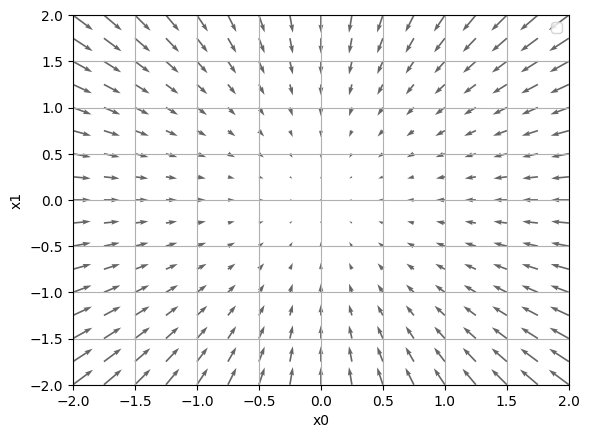

In [3]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f,x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

def numerical_gradient(f,X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f,X)
    
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f,x)

        return grad
    
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
    
def tangent_line(f,x):
    d = numerical_gradient(f,x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X,Y = np.meshgrid(x0,x1)

    X = X.flatten()
    Y = Y.flatten()

    print(X)
    print(Y)

    grad = numerical_gradient(function_2, np.array([X,Y]))
    print(grad)

    plt.figure()
    plt.quiver(X,Y,-grad[0],-grad[1],angles="xy",color="#666666")
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

# 코드 흐름 설명

## 1. 전체 목적

이 코드는 다음을 수행한다:

* 함수 f(x) = x0^2 + x1^2 의 수치 미분 계산
* 각 점에서의 그래디언트(기울기 벡터) 계산
* 그래디언트의 음수 방향(경사 하강 방향)을 2D 벡터 필드로 시각화

---

## 2. 주요 함수 구조

### (1) `_numerical_gradient_no_batch(f, x)`

단일 벡터 x에 대해 중앙차분 방식으로 편미분을 계산한다.

* h = 1e-4 (아주 작은 변화량)
* 각 차원 idx에 대해:

  1. x[idx] + h → f(x+h)
  2. x[idx] - h → f(x-h)
  3. (f(x+h) - f(x-h)) / (2h)
* 결과는 각 차원에 대한 편미분 값

즉, ∂f/∂xi 를 수치적으로 계산한다.

---

### (2) `numerical_gradient(f, X)`

배치 입력을 처리하는 래퍼 함수.

* 1차원 벡터 → `_numerical_gradient_no_batch` 직접 호출
* 2차원 이상 → 각 행(row)에 대해 반복 수행

결과:

* 입력과 동일한 shape의 gradient 반환

---

### (3) `function_2(x)`

정의된 함수:

```
f(x0, x1) = x0^2 + x1^2
```

* 1차원 벡터 → 스칼라 반환
* 2차원 배열 → axis=1 기준 합

이 함수의 해석적 그래디언트는:

```
∇f = (2x0, 2x1)
```

---

## 3. main 블록 실행 흐름

### Step 1. 격자 생성

```python
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
```

* (-2 ~ 2) 범위의 2D grid 생성

### Step 2. 1차원 배열로 변환

```python
X = X.flatten()
Y = Y.flatten()
```

* 각 좌표를 (x0, x1) 점의 나열 형태로 변환

---

### Step 3. 그래디언트 계산

```python
grad = numerical_gradient(function_2, np.array([X, Y]))
```

입력 shape:

```
(2, N)
```

* 첫 번째 행: 모든 x0 값
* 두 번째 행: 모든 x1 값

반환 shape:

```
grad[0] → ∂f/∂x0
grad[1] → ∂f/∂x1
```

이 값은 이론적으로:

```
grad[0] = 2X
grad[1] = 2Y
```

---

### Step 4. 벡터 필드 시각화

```python
plt.quiver(X, Y, -grad[0], -grad[1])
```

* 각 점 (X,Y)에서
* (-∂f/∂x0, -∂f/∂x1) 방향 화살표 그림

왜 음수인가?

* 그래디언트는 함수가 가장 빠르게 증가하는 방향
* 음의 그래디언트는 함수가 가장 빠르게 감소하는 방향
* 즉, 경사 하강법 방향 시각화

이 함수는 원점(0,0)에서 최소값을 가지므로
모든 화살표는 원점을 향하게 된다.

---

## 4. 전체 흐름 요약

1. 2차원 좌표 평면 생성
2. 각 점에서 f(x)=x0²+x1² 계산
3. 중앙차분으로 각 점의 gradient 계산
4. -gradient 방향을 화살표로 시각화
5. 모든 벡터가 원점으로 수렴

---

## 5. 수학적 의미

이 코드는 다음 개념을 시각적으로 보여준다:

* 수치 미분
* 편미분
* 그래디언트 벡터
* 경사 하강 방향
* convex 함수의 최소점 구조

---

필요하다면 다음도 추가 설명 가능:

* 왜 np.array([X, Y]) 구조를 쓰는지
* shape 흐름 추적
* analytical gradient와 비교
* 이 코드를 경사하강법 학습 코드로 확장하는 방법
